In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [2]:
df=pd.read_csv('cancer_reg.csv' , engine='python')
df.head(5)

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


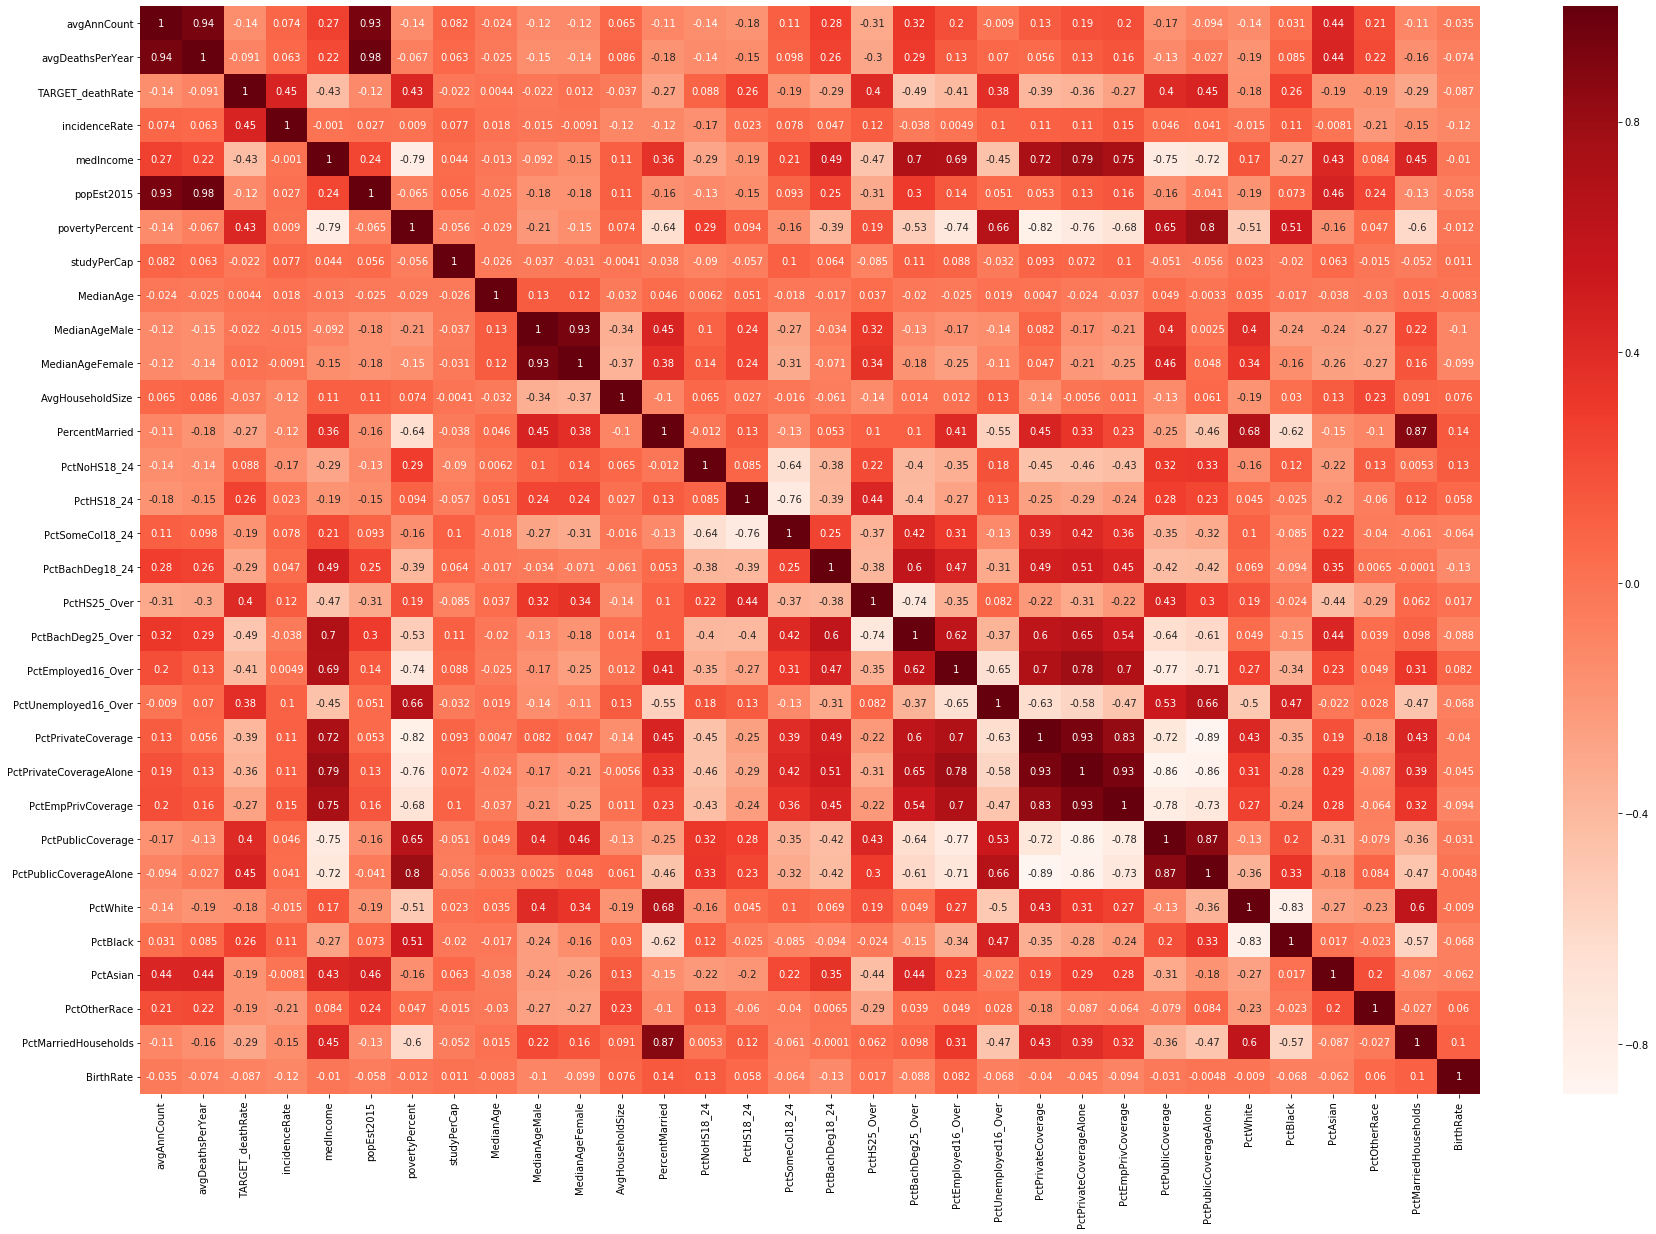

In [3]:
plt.figure(figsize=(30,20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [4]:
df.shape

(3047, 34)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
avgAnnCount                3047 non-null float64
avgDeathsPerYear           3047 non-null int64
TARGET_deathRate           3047 non-null float64
incidenceRate              3047 non-null float64
medIncome                  3047 non-null int64
popEst2015                 3047 non-null int64
povertyPercent             3047 non-null float64
studyPerCap                3047 non-null float64
binnedInc                  3047 non-null object
MedianAge                  3047 non-null float64
MedianAgeMale              3047 non-null float64
MedianAgeFemale            3047 non-null float64
Geography                  3047 non-null object
AvgHouseholdSize           3047 non-null float64
PercentMarried             3047 non-null float64
PctNoHS18_24               3047 non-null float64
PctHS18_24                 3047 non-null float64
PctSomeCol18_24            762 non-null float64
PctBachDeg18_24     

In [6]:
df.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [7]:
df.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [8]:
df.drop(['PctSomeCol18_24','binnedInc'], axis=1,inplace=True)

In [9]:
df=df.fillna(df.mean())

In [10]:
df.shape

(3047, 32)

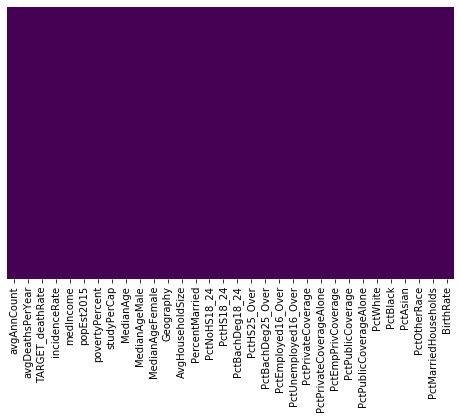

In [11]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis') #to check if null values exist

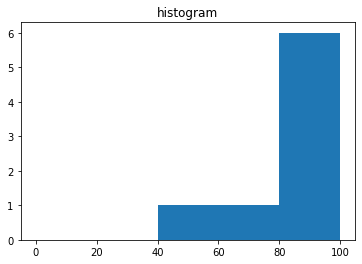

In [12]:
plt.hist(df['TARGET_deathRate'], bins = [0,20,40,60,80,100]) 
plt.title("histogram") 
plt.show()

In [13]:
import sklearn
from sklearn.model_selection import train_test_split

In [14]:
df.drop('Geography',axis=1,inplace=True)

In [15]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [16]:
print(df_train.shape)
print(df_test.shape)

(2132, 31)
(915, 31)


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [18]:
var = ['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']

df_train[var] = scaler.fit_transform(df_train[var])

In [19]:
df_train[var].describe() 

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,...,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000
mean,0.015994,0.013162,0.332756,0.246720,0.242738,0.009938,0.315581,0.015185,0.041417,0.406429,...,0.490869,0.460105,0.466536,0.401008,0.816613,0.106992,0.029152,0.048148,0.512176,0.265180
std,0.039331,0.038416,0.099609,0.054709,0.118444,0.034046,0.155016,0.055709,0.080360,0.124584,...,0.158810,0.173714,0.144703,0.161374,0.186820,0.172111,0.062554,0.087820,0.118423,0.093772
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001757,0.001785,0.269622,0.219918,0.163741,0.001004,0.201456,0.000000,0.027947,0.330969,...,0.395390,0.335807,0.371058,0.283820,0.746469,0.007502,0.005851,0.006911,0.450805,0.211404
50%,0.004129,0.004069,0.329215,0.250845,0.224313,0.002392,0.288835,0.000000,0.033555,0.406619,...,0.492088,0.458256,0.469388,0.389920,0.890222,0.025708,0.012748,0.019297,0.519783,0.252451
75%,0.013397,0.009781,0.390625,0.277471,0.295840,0.006252,0.400485,0.007542,0.039117,0.477541,...,0.586879,0.580705,0.562152,0.501326,0.950926,0.124532,0.027662,0.051124,0.586626,0.306974
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
y_train = df_train.pop('TARGET_deathRate')
X_train = df_train

In [21]:
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [22]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     75.21
Date:                Tue, 28 Apr 2020   Prob (F-statistic):          4.09e-306
Time:                        23:37:55   Log-Likelihood:                 2670.4
No. Observations:                2132   AIC:                            -5279.
Df Residuals:                    2101   BIC:                            -5103.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [23]:
X = X_train.drop('studyPerCap', axis=1)


In [24]:
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [25]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     77.83
Date:                Tue, 28 Apr 2020   Prob (F-statistic):          5.06e-307
Time:                        23:37:56   Log-Likelihood:                 2670.3
No. Observations:                2132   AIC:                            -5281.
Df Residuals:                    2102   BIC:                            -5111.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [26]:
X = X.drop('PctBachDeg18_24', 1)
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     80.62
Date:                Tue, 28 Apr 2020   Prob (F-statistic):          6.77e-308
Time:                        23:37:56   Log-Likelihood:                 2670.1
No. Observations:                2132   AIC:                            -5282.
Df Residuals:                    2103   BIC:                            -5118.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [27]:
X = X.drop('PctPrivateCoverageAlone', 1)
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     83.61
Date:                Tue, 28 Apr 2020   Prob (F-statistic):          9.07e-309
Time:                        23:37:56   Log-Likelihood:                 2669.9
No. Observations:                2132   AIC:                            -5284.
Df Residuals:                    2104   BIC:                            -5125.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [28]:
X = X.drop('MedianAgeMale', 1)
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     86.82
Date:                Tue, 28 Apr 2020   Prob (F-statistic):          1.27e-309
Time:                        23:37:56   Log-Likelihood:                 2669.6
No. Observations:                2132   AIC:                            -5285.
Df Residuals:                    2105   BIC:                            -5132.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [29]:
X = X.drop('PctAsian', 1)
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     90.26
Date:                Tue, 28 Apr 2020   Prob (F-statistic):          2.10e-310
Time:                        23:37:56   Log-Likelihood:                 2669.1
No. Observations:                2132   AIC:                            -5286.
Df Residuals:                    2106   BIC:                            -5139.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [30]:
y_train_p = lr_3.predict(X_train_lm)

Text(0.5, 0, 'Errors')

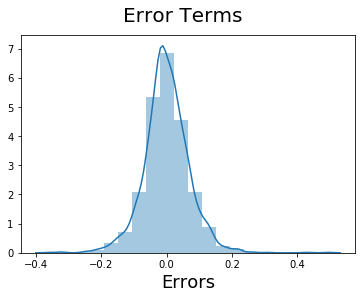

In [31]:
fig = plt.figure()
sns.distplot((y_train - y_train_p), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

In [32]:
from sklearn.metrics import r2_score
from sklearn import metrics

In [33]:
r2_score(y_true=y_train,y_pred=y_train_p )

0.5172502913588353

In [34]:
print("MAE is:\t",metrics.mean_absolute_error(y_train,y_train_p))
print("MSE is:\t",metrics.mean_squared_error(y_train,y_train_p))
print("RMSE is:",np.sqrt(metrics.mean_squared_error(y_train,y_train_p)))

MAE is:	 0.051032410943372825
MSE is:	 0.0047875884053089
RMSE is: 0.06919240135527094


In [35]:
var = ['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']

df_test[var] = scaler.transform(df_test[var])

In [36]:
y_test = df_test.pop('TARGET_deathRate')
X_test = df_test

In [37]:
X_test_m4 = sm.add_constant(X_test)

In [38]:
X_test_m4.columns

Index(['const', 'avgAnnCount', 'avgDeathsPerYear', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone',
       'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone',
       'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace',
       'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

In [39]:
X_test_m4 = X_test_m4.drop(['studyPerCap','PctAsian','MedianAgeMale','PctBachDeg18_24','PctPrivateCoverageAlone'], axis = 1)

In [40]:
X_test_m4.columns

Index(['const', 'avgAnnCount', 'avgDeathsPerYear', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'MedianAge',
       'MedianAgeFemale', 'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24',
       'PctHS18_24', 'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

In [41]:
y_pred_m4 = lr_3.predict(X_test_m4)

Text(0, 0.5, 'y_pred')

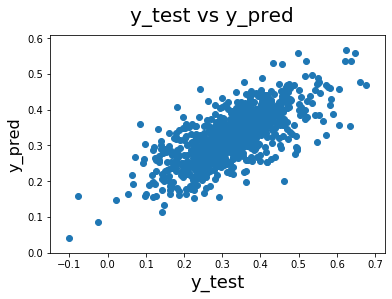

In [42]:
fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [43]:
from sklearn.metrics import r2_score
from sklearn import metrics

In [44]:
r2_score(y_true=y_test,y_pred=y_pred_m4 )

0.5247587180765081

In [45]:
print("MAE is:\t",metrics.mean_absolute_error(y_test,y_pred_m4))
print("MSE is:\t",metrics.mean_squared_error(y_test, y_pred_m4))
print("RMSE is:",np.sqrt(metrics.mean_squared_error(y_test, y_pred_m4)))

MAE is:	 0.053185192387637095
MSE is:	 0.005093384417332404
RMSE is: 0.07136795091168306


# DECISION TREE

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3, random_state = 10)

from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.metrics import r2_score , mean_squared_error

In [47]:
DecisionTree_regressor = DecisionTreeRegressor(random_state = 0)  
DecisionTree_regressor.fit(X_train, y_train) 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [48]:
y_test_pred = DecisionTree_regressor.predict(X_test)

In [49]:
# training and testing RMSE
Test_RMSE = np.sqrt(mean_squared_error(y_test , y_test_pred))


In [50]:
# R-square score
r2 = r2_score(y_test , y_test_pred)


In [51]:
# Displaying the value 
print('R_SQAURE_score is {}'.format(r2))
print()
print('Testing RMSE is {}'.format(Test_RMSE))

R_SQAURE_score is 0.08070563909493411

Testing RMSE is 0.08823984498339812


In [52]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3, random_state = 10)

from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import r2_score , mean_squared_error 

# Training the model
RandomForest_regressor = RandomForestRegressor(n_estimators=5)  
RandomForest_regressor.fit(X_train, y_train) 

#prediciting the values of both train and test using the model 
y_train_pred = RandomForest_regressor.predict(X_train)
y_test_pred = RandomForest_regressor.predict(X_test)

# training and testing RMSE
Train_RMSE = np.sqrt(mean_squared_error(y_train , y_train_pred))
Test_RMSE = np.sqrt(mean_squared_error(y_test , y_test_pred))

# R-square score
r2 = r2_score(y_test , y_test_pred)
r1=r2_score(y_train,y_train_pred)
# Displaying the value 
print('R_SQAURE_score is {}'.format(r2))
print()
print('R_SQAURE_score is {}'.format(r1))
print()
print('Training RMSE is {}'.format(Train_RMSE))
print('Testing RMSE is {}'.format(Test_RMSE))

R_SQAURE_score is 0.40123929515574985

R_SQAURE_score is 0.8729263759594033

Training RMSE is 0.0364074451912463
Testing RMSE is 0.08024747567475836


# RIDGE REGRESSION

In [53]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print('RMSE train:',np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print('R-square train:',r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print('RMSE test:',np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print('R-square test:',r2_score(y_test, pred_test_rr))


RMSE train: 0.06947564136598484
R-square train: 0.5372567031719564
RMSE test: 0.07284024386471442
R-square test: 0.5066747852681914


# Lasso Regression

In [54]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print('RMSE train:',np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print('R-square train:',r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print('RMSE test:',np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print('R-square test:',r2_score(y_test, pred_test_lasso))

RMSE train: 0.10213215518821207
R-square train: 0.0
RMSE test: 0.10378380139378765
R-square test: -0.0014970614530511739


# ElasticNet Regression

In [55]:
#Elastic Net
from sklearn.linear_model import ElasticNet
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
print('RMSE train:',np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print('R-square train:',r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(X_test)
print('RMSE test:',np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print('R-square test:',r2_score(y_test, pred_test_enet))

RMSE train: 0.0929701395143404
R-square train: 0.17136748177359107
RMSE test: 0.09729879818471195
R-square test: 0.11975111560807772
